In [2]:
%pylab inline
from scipy.special import erf

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Problem 1
#Explicit solution
ntimes = 100000
nx = 1000
xmax = 100.*10**3 #100 km, written in meters
kappa = 10**-6#m^2/s
dx = xmax/(nx-1.)
Fo = 0.5 #stable for <=0.5, Fo=kappa*dt/dx^2
dt = Fo*dx**2./kappa
#create array of temps for all x and t
T = zeros([ntimes,nx])
#set initial condition
T[0,:] = 1600.
T_top = 0.
T_bottom = 1600.
T_fluid = 1150
D_trans = zeros(ntimes)
sec_per_yr = 60.*60.*24.*365.
t_yr = arange(ntimes)*dt/sec_per_yr
depths = arange(nx)*dx
for n in arange(ntimes-1):
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
    T[n+1,1:-1] = Fo*T[n,2:] + (1.-2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]
    tmp = depths[T[n+1,:]>T_fluid]
    D_trans[n+1] = tmp[0]

Text(0, 0.5, 'Depth to transition (km)')

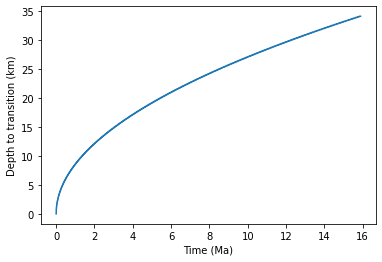

In [4]:
plot(t_yr/10.**6,D_trans/1000.)
xlabel('Time (Ma)')
ylabel('Depth to transition (km)')


In [5]:
#Problem 2
rho_m_hot = 3300. #kg/m^3
rho_m_cool = 3600.
rho_w = 1000.#kg/m^3, density of water
D_ridge = D_trans*(rho_m_cool - rho_m_hot)/(rho_m_hot - rho_w)

Text(0, 0.5, 'Depth of ridge (m)')

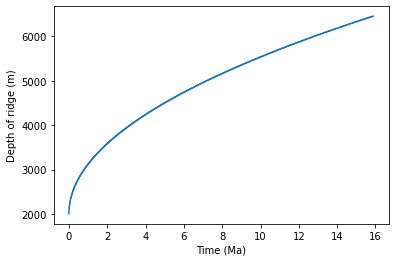

In [6]:
D_crest = 2000.
plot(t_yr/10.**6,D_ridge+ D_crest)
xlabel('Time (Ma)')
ylabel('Depth of ridge (m)')

In [7]:
#Problem 3
#Explicit solution with varying surface temp
ntimes = 200000
nx = 500
xmax = 5. #m
kappa = 10**-6#m^2/s
dx = xmax/(nx-1.)
Fo = 0.45 #stable for <=0.5, Fo=kappa*dt/dx^2
dt = Fo*dx**2./kappa
#create array of temps for all x and t
T = zeros([ntimes,nx])
#set initial condition
T[0,:] = 15.
T_bottom = 15.
sec_per_yr = 60.*60.*24.*365.
t = arange(ntimes)*dt
x = arange(nx)*dx
period = 60.*60.*24.
for n in arange(ntimes-1):
    T_top = 15. + 5.*sin((2.*pi/period)*t[n])
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
    T[n+1,1:-1] = Fo*T[n,2:] + (1.-2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]


In [8]:
print("Number of days simulated: ", t[-1]/60./60./24.)
print("Timestep (secs): ", dt)

Number of days simulated:  104.58406375208666
Timestep (secs):  45.18054144360866


(0.0, 50.0)

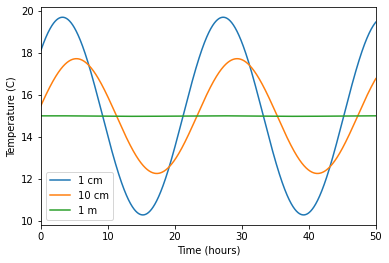

In [9]:
#Find the index that approximately matches the desired depth
depth1_idx = round(0.01/dx)
depth2_idx = round(0.1/dx)
depth3_idx = round(1./dx)
t_hours = t/60./60.#convert t to time in hours for convenience in plotting
#I will plot the last part of the simulation, after the influence of initial conditions has died out
# If you plot the whole simulation, you can't see what is going on
start_time = -20000 #look at the last 20,000 timesteps
plot(t_hours[start_time:] - t_hours[start_time], T[start_time:,depth1_idx])
plot(t_hours[start_time:] - t_hours[start_time], T[start_time:,depth2_idx])
plot(t_hours[start_time:] - t_hours[start_time], T[start_time:,depth3_idx])
legend(['1 cm', '10 cm', '1 m'])
ylabel('Temperature (C)')
xlabel('Time (hours)')
xlim([0,50])

In [10]:
#Calculate skin depth
D_skin = sqrt(kappa*period)
print("Skin depth = ", D_skin, "m")

Skin depth =  0.29393876913398137 m


Since the first two depths are less than the skin depth, we would expect to see significant temperature variations at those depths. The 1 m depth is several times the skin depth, so we would expect the amplitude to be very small at that depth (which it is).

Text(0, 0.5, 'Max temperature (C)')

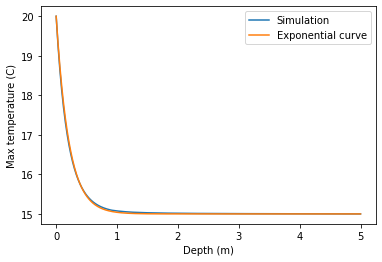

In [11]:
#The above answer is sufficient. This is a more sophisticated way to look at the question. You can calculate
#  the maximum temperature seen at each depth using the max() function and specifying the axis over which you want to find a max.
#  In this case, it's the time axis (0).
T_max_at_given_depth = T.max(axis=0)
plot(x, T_max_at_given_depth)
#Exponential curve with e-folding length of D_skin/sqrt(2)
plot(x, 15. + 5.*exp(-x*sqrt(2)/D_skin))
legend(['Simulation', 'Exponential curve'])
xlabel('Depth (m)')
ylabel('Max temperature (C)')

The max temperature as a function of depth is very close to an exponential curve with a length scale equal to the skin depth. Actually, the analytical solution would have the skin depth equal to $D_{skin} = \sqrt{\kappa t/2}$, which is a near perfect match above.

In [12]:
#Problem 3
#annual variations of surface temp
ntimes = 800000
nx = 500
xmax = 10. #m
kappa = 10**-6#m^2/s
dx = xmax/(nx-1.)
Fo = 0.45 #stable for <=0.5, Fo=kappa*dt/dx^2
dt = Fo*dx**2./kappa
#create array of temps for all x and t
T = zeros([ntimes,nx])
#set initial condition
T[0,:] = 15.
T_bottom = 15.
sec_per_yr = 60.*60.*24.*365.
t = arange(ntimes)*dt
x = arange(nx)*dx
period = sec_per_yr
for n in arange(ntimes-1):
    T_top = 15. + 5.*sin((2.*pi/period)*t[n])
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
    T[n+1,1:-1] = Fo*T[n,2:] + (1.-2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]


In [13]:
print("Number of days simulated: ", t[-1]/60./60./24.)
print("Timestep (secs): ", dt)

Number of days simulated:  1673.351295108587
Timestep (secs):  180.72216577443464


Text(0.5, 0, 'Time (days)')

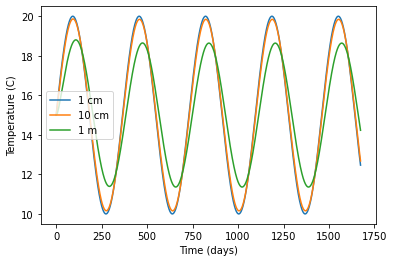

In [14]:
#Find the index that approximately matches the desired depth
depth1_idx = round(0.01/dx)
depth2_idx = round(0.1/dx)
depth3_idx = round(1./dx)
t_days = t/60./60./24.#convert t to time in days for convenience in plotting
plot(t_days, T[:,depth1_idx])
plot(t_days, T[:,depth2_idx])
plot(t_days, T[:,depth3_idx])
legend(['1 cm', '10 cm', '1 m'])
ylabel('Temperature (C)')
xlabel('Time (days)')


In [16]:
#Calculate skin depth
D_skin = sqrt(kappa*period)
print ("Skin depth = ", D_skin, "m")

Skin depth =  5.615692299262843 m


Here the temperature variations are substantial at all measured depths. This is because the skin depth is over 5 meters with the annual period.

Text(0, 0.5, 'Max temperature (C)')

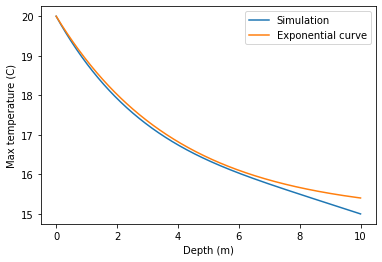

In [17]:
T_max_at_given_depth = T.max(axis=0)
plot(x, T_max_at_given_depth)
#Exponential curve with e-folding length of D_skin/sqrt(2)
plot(x, 15. + 5.*exp(-x*sqrt(2)/D_skin))
legend(['Simulation', 'Exponential curve'])
xlabel('Depth (m)')
ylabel('Max temperature (C)')

Again we could plot the exponential decay of temperature with depth. Here, the solutions disagree a bit near the bottom, but this is because of the constant temperature boundary we have put there. It is not a semi-infinite medium as in the analytical solution.